In [1]:
#Note: This code obtain the feature importance and plot Figure 6(a) of the mansucript.

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import joblib


X=np.load('xlo.npy')[:,:] 
y=np.load('ylo1.npy') #ylo1.npy is binarized version of ylo.npy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf = joblib.load('rf_model_Rockfish.joblib') #You can remove this and activate the following two lines to do the training
#rf.fit(X_train, y_train)
#joblib.dump(rf, 'rf_model.joblib')

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_scores = f1_score(y_test, y_test_pred, average=None)
X_test_unseen=np.load('xlo_test.npy')[:,:]
y_test_unseen=np.load('ylo_test1.npy')[:]
y_pred_unseen=rf.predict(X_test_unseen)
f1 = f1_score(y_test_unseen, y_pred_unseen, average=None)
print(f"Overall validation Accuracy: {test_accuracy:.4f}") 
print(f"Class 0 validation F1 Score: {test_f1_scores[0]:.4f}") 
print(f"Class 1 validation F1 Score: {test_f1_scores[1]:.4f}") 
print(f"Class 0 F1 Score for testing data: {f1[0]:.4f}") 
print(f"Class 1 F1 Score for testing data:{f1[1]:.4f}") 
print('The feature ranking is=',indices)

Overall validation Accuracy: 0.9966
Class 0 validation F1 Score: 0.9983
Class 1 validation F1 Score: 0.9179
Class 0 F1 Score for testing data: 0.9986
Class 1 F1 Score for testing data:0.9290
The feature ranking is= [ 9  6 34  8  3 20 15 14  5  1 21 12 26  4 11 13 10  7  2 23  0 33 27 19
 29 32 22 17 30 28 16 25 31 24 18]


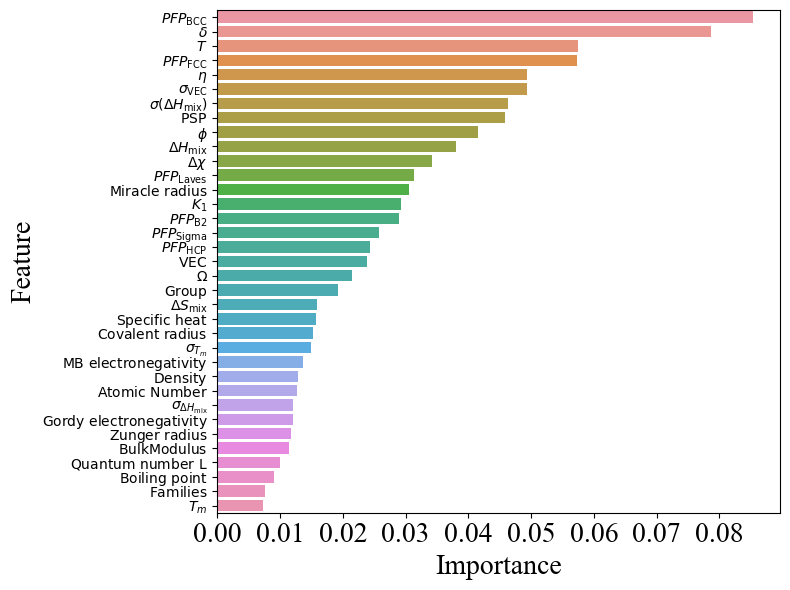

In [2]:
#Note: This code plot Figure 6(a) of the mansucript.

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = [7,9,38,40,45,48,49,39,25,26,29,47,34,35,41,46]
feature_names = [
    r"$\Delta S_{\mathrm{mix}}$", r"$\Delta H_{\mathrm{mix}}$", r"$\Omega$", r"$\eta$", r"$K_1$", r"$\phi$", r"$\delta$", r"$E_2/E_0$",
    r"$\mathrm{VEC}$", r"$\Delta \chi$", r"$PFP_{\mathrm{FCC}}$", r"$PFP_{\mathrm{BCC}}$", r"$PFP_{\mathrm{HCP}}$", r"$PFP_{\mathrm{B2}}$",
    r"$PFP_{\mathrm{Laves}}$", r"$PFP_{\mathrm{Sigma}}$", r"$\mathrm{PSP}$", r"$\sigma(\Delta H_{\mathrm{mix}})$", r"$\mathrm{BulkModulus}$",
    r"$\sigma_{\Delta H_{\mathrm{mix}}}$", r"$T_m$", r"$\sigma_{T_m}$", r"$\sigma_{\mathrm{VEC}}$", r"$\Delta\chi$",
    r"$\mathrm{Atomic\ Number}$", r"$\mathrm{Atomic\ weight}$", r"$\mathrm{Period}$", r"$\mathrm{Group}$", r"$\mathrm{Families}$", r"$\mathrm{Mendeleev\ Number}$",
    r"$\mathrm{Quantum\ number\ L}$", r"$\mathrm{Miracle\ radius}$", r"$\mathrm{Covalent\ radius}$", r"$\mathrm{Zunger\ radius}$", r"$\mathrm{Ionic\ radius}$",
    r"$\mathrm{Crystal\ radius}$", r"$\mathrm{MB\ electronegativity}$", r"$\mathrm{Gordy\ electronegativity}$", r"$\mathrm{Mulliken\ electronegativity}$",
    r"$\mathrm{Allred{-}Rockow\ electronegativity}$", r"$\mathrm{First\ ionization\ potential}$", r"$\mathrm{Polarizability}$",
    r"$\mathrm{Boiling\ point}$", r"$\mathrm{Density}$", r"$\mathrm{Specific\ heat}$", r"$\mathrm{Heat\ of\ fusion}$", r"$\mathrm{Heat\ of\ vaporization}$",
    r"$\mathrm{Thermal\ conductivity}$", r"$\mathrm{Heat\ atomization}$", r"$\mathrm{Cohesive\ energy}$", r"$T$"
]

feature_names = np.array(feature_names)
feature_names = np.delete(feature_names, n)
top_n = 35
top_features = pd.DataFrame({
    'Feature': feature_names[indices[:top_n]],
    'Importance': importances[indices[:top_n]]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', orient='h')
plt.xlabel('Importance', fontsize=20,fontname='Times New Roman')
plt.ylabel('Feature', fontsize=20,fontname='Times New Roman')
plt.xticks(fontsize=20,fontname='Times New Roman')
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('figure.png', dpi=600)
plt.show()

In [7]:
#This code quantify the performance of the first SVM trainined using SVM.ipynb on the testing dataset. Here, we only load
#the network trained in SVM folder

svm = joblib.load('svm_model.joblib')
X_test_unseen=np.load('xlo_test.npy')[:,[9,6,34,8,3,20,15,14,5,1,21,12,26,4,11,13,10,7,2,23,0]]
y_test_unseen=np.load('ylo_test1.npy')[:] #Binarized version of ylo_test.npy
y_pred_unseen=svm.predict(X_test_unseen)
test_accuracy = accuracy_score(y_test_unseen, y_pred_unseen)
f1 = f1_score(y_test_unseen, y_pred_unseen, average=None)
cm = confusion_matrix(y_test_unseen, y_pred_unseen, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
print(f"Class 0 F1 Score: {f1[0]:.4f}") 
print(f"Class 1 F1 Score: {f1[1]:.4f}") 
print(f"Overall Testing Accuracy: {test_accuracy:.4f}") 
print("TN, FP, Fn, and TP=",(tn,fp,fn,tp))

Class 0 F1 Score: 0.9735
Class 1 F1 Score: 0.4367
Overall Testing Accuracy: 0.9494
TN, FP, Fn, and TP= (32038, 1732, 12, 676)


In [8]:
#This code quantify the performance of the second SVM trainined using SVM.ipynb on the testing dataset. Here, we only load
#the network trained in SVM folder

svm = joblib.load('svm1_model.joblib')
X_test_unseen=np.load('xlo_test.npy')[:,[9,6,34,8,3,20,15,14,5,1,21,12,26,4,11,13,10,7,2,23,0]]
y_test_unseen=np.load('ylo_test1.npy')[:] #Binarized version of ylo_test.npy
y_pred_unseen=svm.predict(X_test_unseen)
test_accuracy = accuracy_score(y_test_unseen, y_pred_unseen)
f1 = f1_score(y_test_unseen, y_pred_unseen, average=None)
cm = confusion_matrix(y_test_unseen, y_pred_unseen, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
print(f"Class 0 F1 Score: {f1[0]:.4f}") 
print(f"Class 1 F1 Score: {f1[1]:.4f}") 
print(f"Overall Testing Accuracy: {test_accuracy:.4f}") 
print("TN, FP, Fn, and TP=",(tn,fp,fn,tp))

Class 0 F1 Score: 0.9935
Class 1 F1 Score: 0.7165
Overall Testing Accuracy: 0.9873
TN, FP, Fn, and TP= (33471, 299, 137, 551)


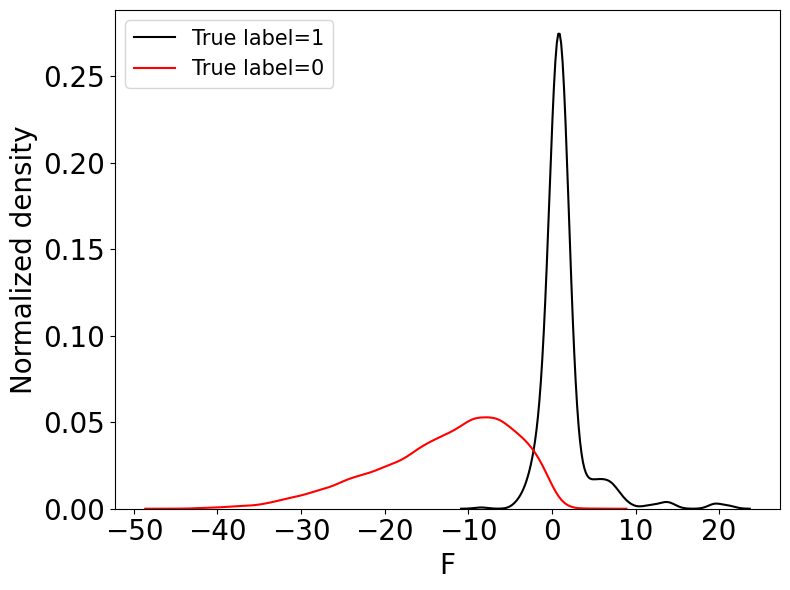

In [14]:
#Note: This code plots Figure 6(b) of the manusciprt.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
svm = joblib.load('svm1_model.joblib')
coefficients = svm.coef_ 
intercept = svm.intercept_ 

#print("Intercept:", intercept) 
#print("Coefficients:", coefficients)


A=np.load('xlo_test.npy')
B=np.load('ylo_test1.npy')

n=0
C=np.zeros([A.shape[0],1])
for i in range(A.shape[0]):
    Y=60.90+5.02*A[i,9]-31.96*A[i,6]-3.66*A[i,34]-60.86*A[i,8]-11.25*A[i,3]+15.03*A[i,20]-15.91*A[i,15]-5.36*A[i,14]+7.60*A[i,5]-19.64*A[i,1]-36.26*A[i,21]+23.32*A[i,12]-16.43*A[i,26]+1.64*A[i,4]-28.65*A[i,11]-1.97*A[i,13]-16.77*A[i,10]-1.38*A[i,7]+4.65*A[i,2]-1.16*A[i,23]+3.50*A[i,0] 
    #The parameters within Y are based on values of intercept and coefficients
    C[i,0]=Y
    if Y>0 and B[i]==0:
            n=n+1         
Bl=np.zeros([0,1])
Re=np.zeros([0,1])
for i in range(B.shape[0]):
    if B[i]==1:
        Bl=np.append(Bl,C[[i]],axis=0)
    else:
        Re=np.append(Re,C[[i]],axis=0)

c=np.zeros([Re.shape[0],1])
Re=np.append(c,Re,axis=1)
c=np.ones([Bl.shape[0],1])
Bl=np.append(c,Bl,axis=1)

plt.figure(figsize=(8, 6))    
sns.kdeplot(Bl[:, 1], color='black', label='True label=1')
sns.kdeplot(Re[:, 1], color='red', label='True label=0')
plt.xlabel('F',fontsize=20) 
plt.ylabel('Normalized density',fontsize=20, )
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('figure1.png', dpi=600)